# TP 3 - Tom Chauvel

# Partie 1
### Question 1

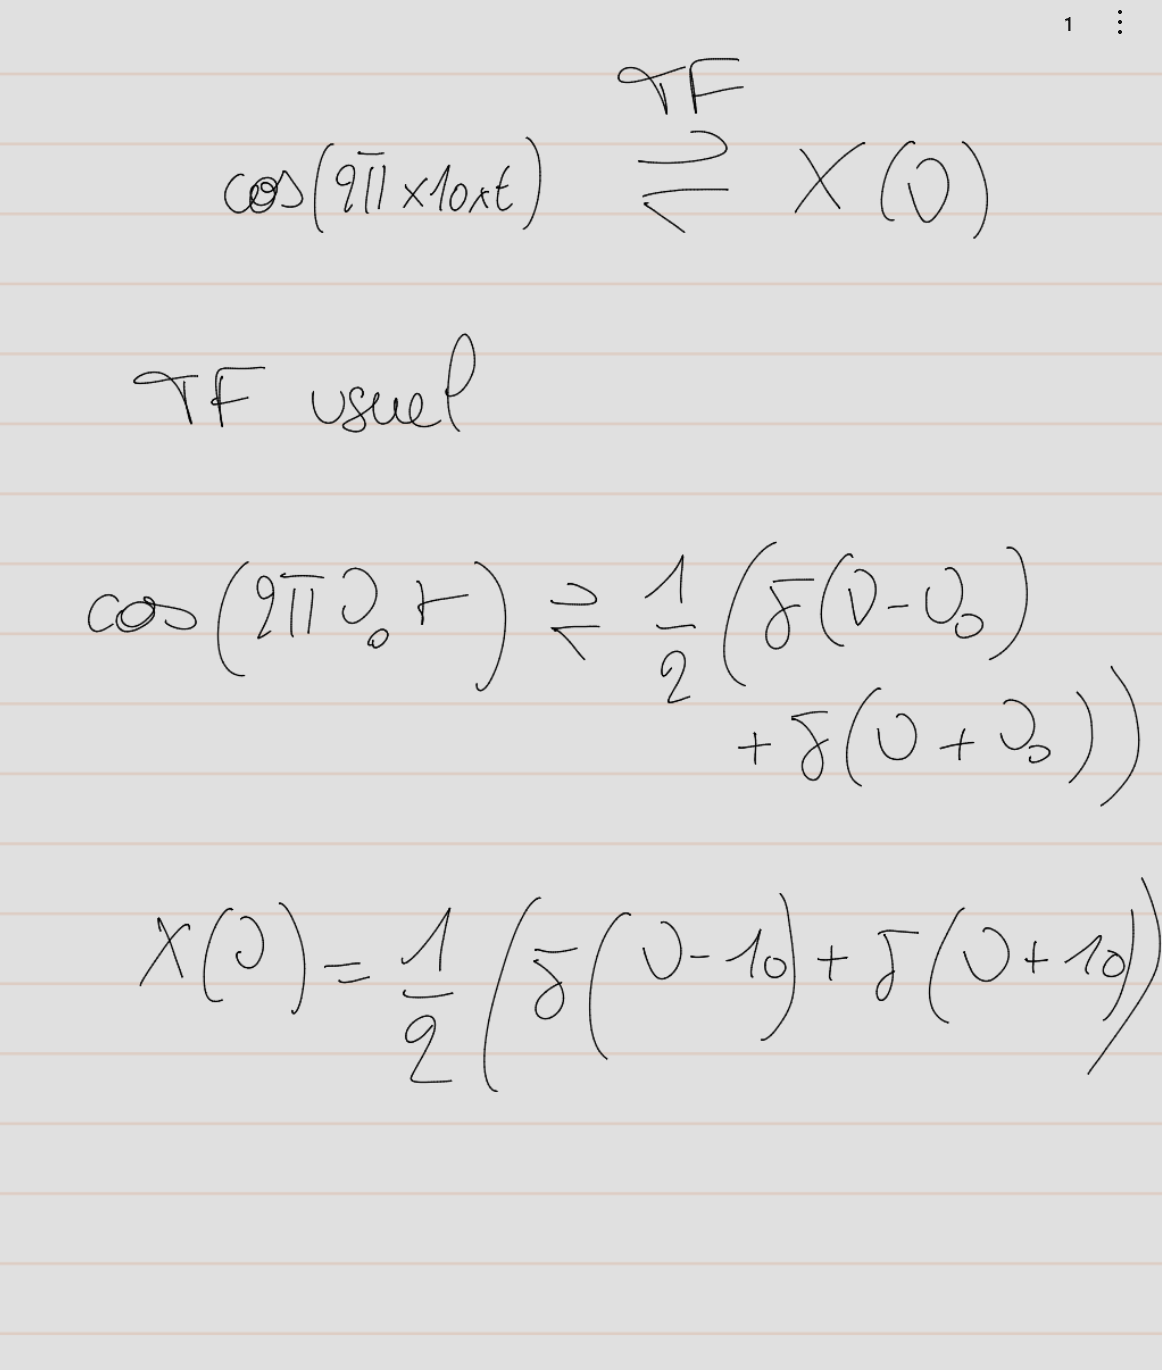

### Question 2

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from numpy.fft import fftshift
from scipy import *

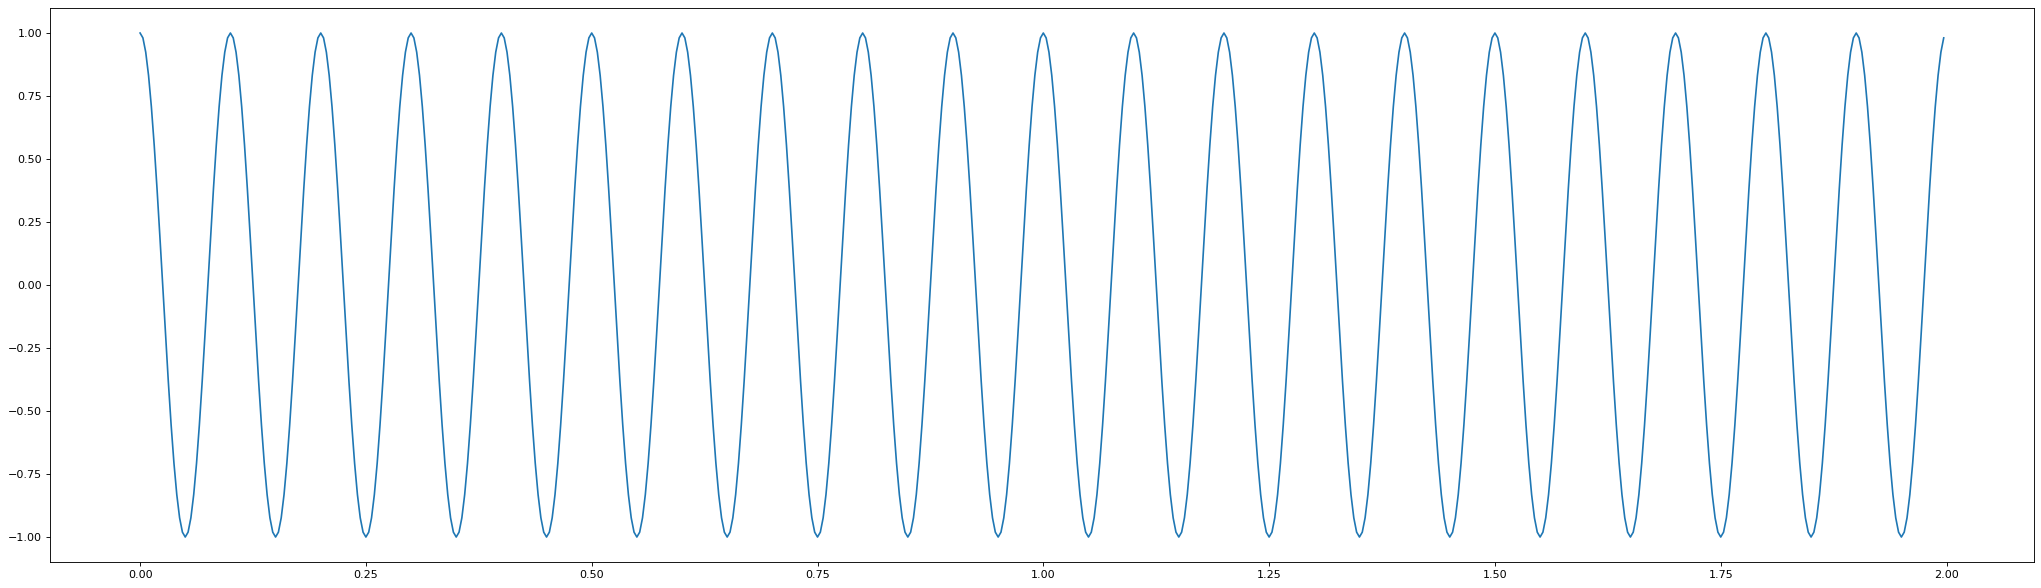

In [92]:
f0 = 10
fs = 1/32/f0
t = np.arange(0,2,fs)

x = lambda t: np.cos(2*np.pi * f0 * t )

s=x(t)
plt.figure(figsize=(32, 9), dpi=80)
plt.plot(t,s)

### Question 3 et 4

<StemContainer object of 3 artists>

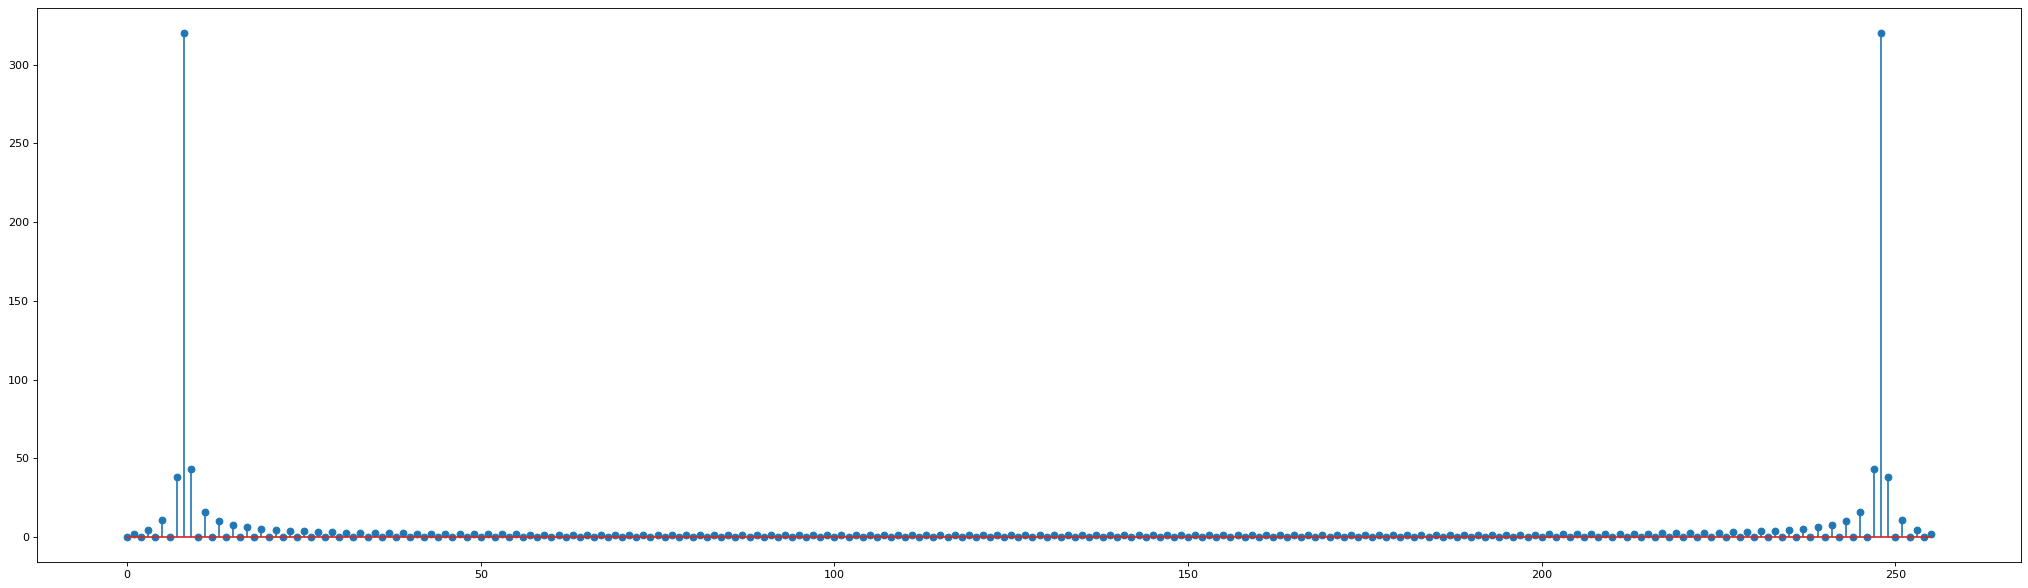

In [93]:
M = 256

def TFD(m,signal):
    n=1/M
    s = 0
    for i in range(len(signal)):
        s += signal[i]*np.e**(-2*1j*np.pi*i*m/M)
    return s

ms = np.arange(0,M,1)

sTDF = TFD(ms,s)
plt.figure(figsize=(32, 9), dpi=80)
plt.stem(ms,np.absolute(sTDF))

### Question 5

<StemContainer object of 3 artists>

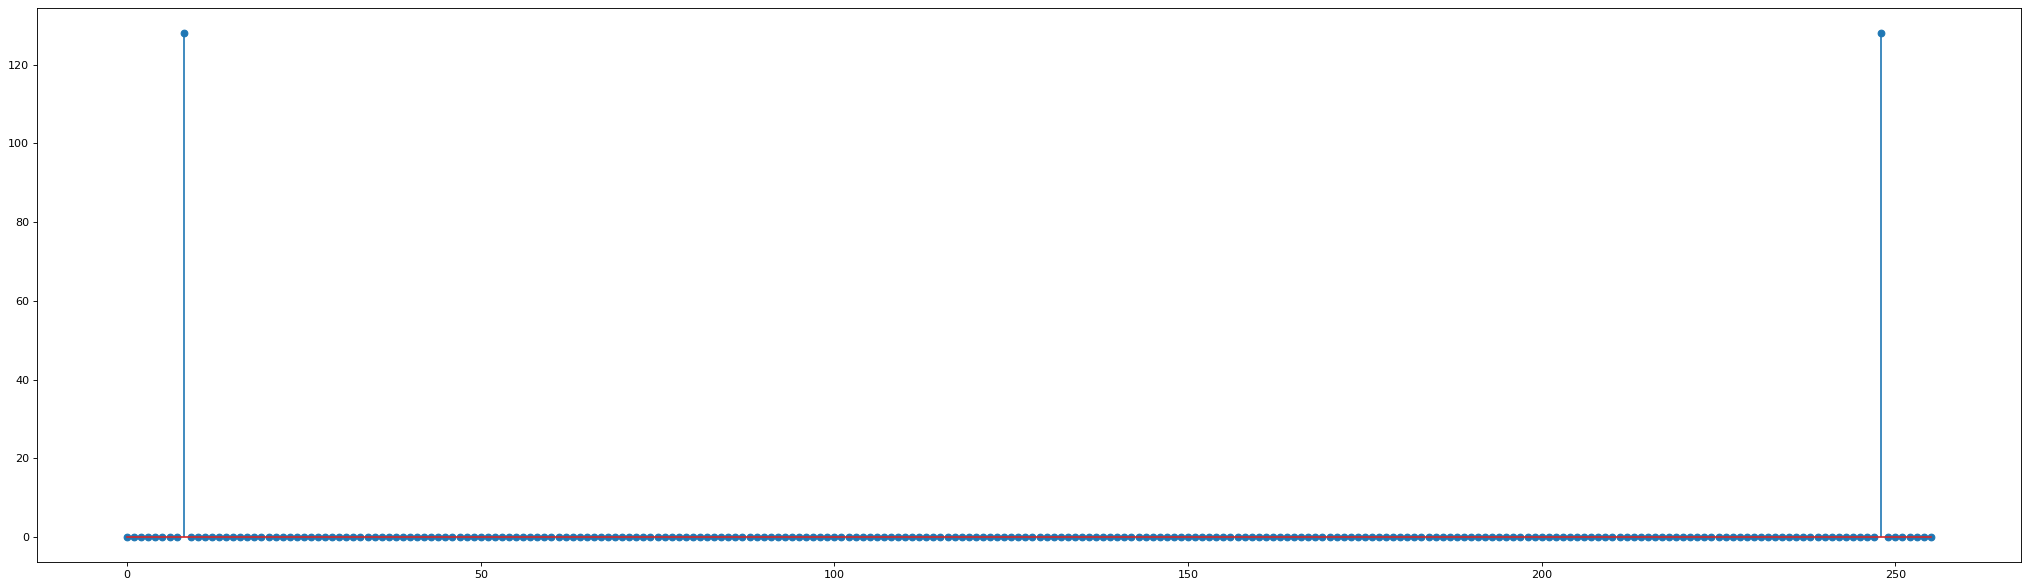

In [94]:
lfft = fft.fft(s,M)

plt.figure(figsize=(32, 9), dpi=80)
plt.stem(ms,np.absolute(lfft))

On remarque que le grand pic de gauche se trouve à environ 10Hz, ce qui correspond à la fréquence du signal. Le pic de droite est environ à 246, soit 256 (M) - f0 (fréquence initiale).

### Question 6

<StemContainer object of 3 artists>

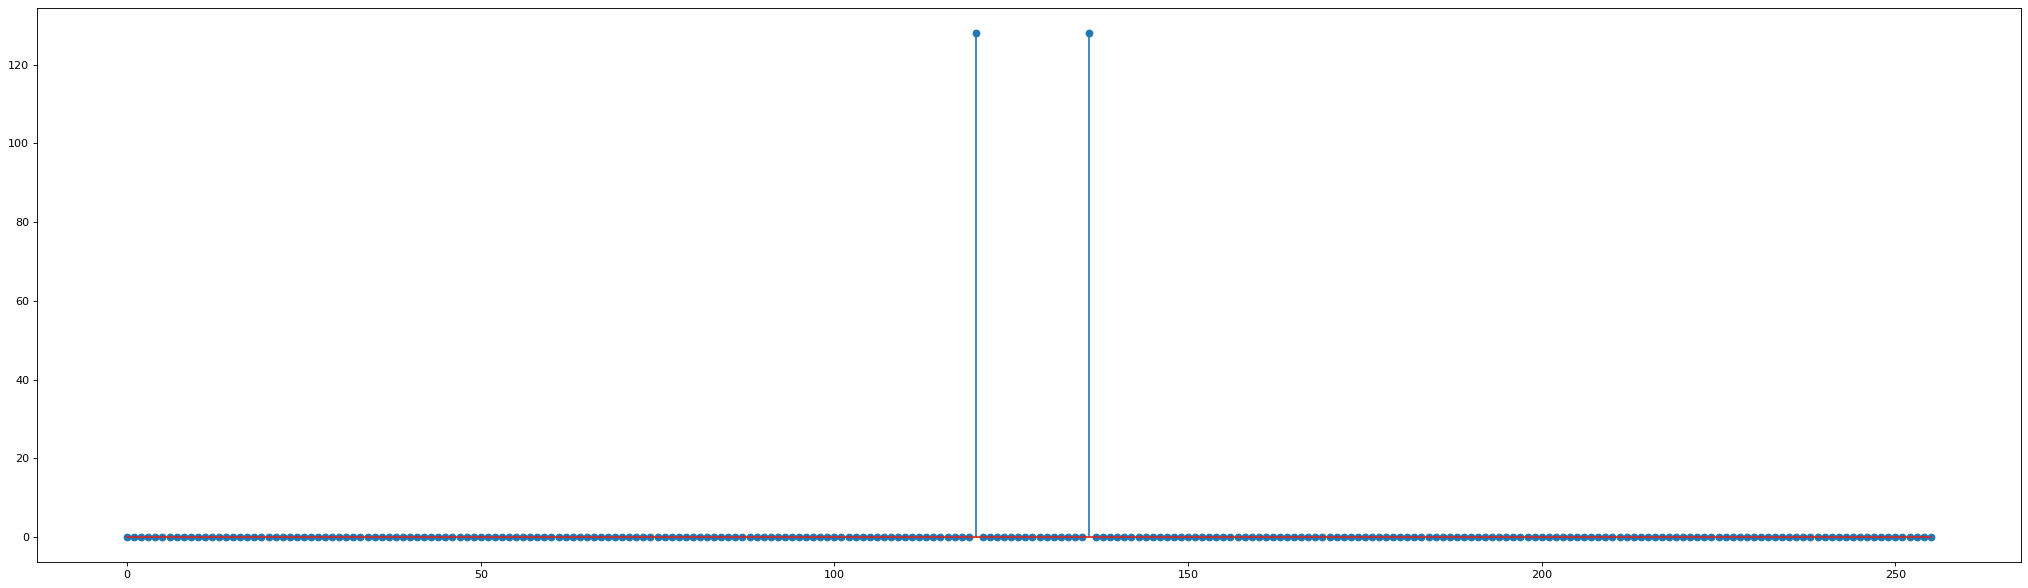

In [95]:
sfft = fft.fftshift(lfft)

plt.figure(figsize=(32, 9), dpi=80)
plt.stem(fft.fftshift(ms),np.absolute(sfft))

<StemContainer object of 3 artists>

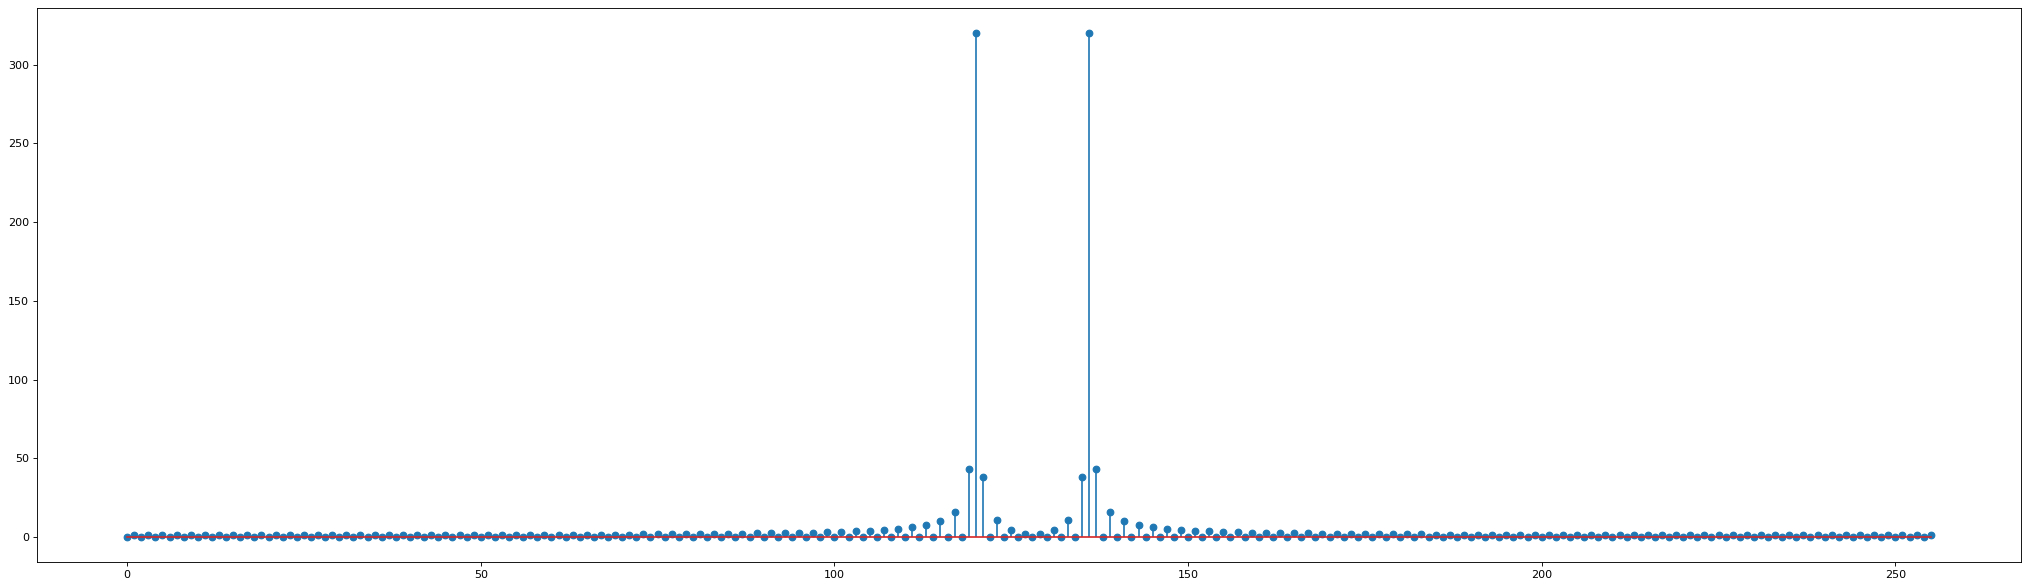

In [96]:
sfft2 = fft.fftshift(sTDF)

plt.figure(figsize=(32, 9), dpi=80)
plt.stem(fft.fftshift(ms),np.absolute(sfft2))

La fftshift, recentre les pics sur les cotés, au centre. Cela nous permet de mieux voir les pics.

# Partie 2
### Question 1

In [97]:
f0 = 100
fs = 1/f0
t = np.arange(0,10,fs)

v = lambda t : np.sin(2 * np.pi * 1.12 * t)

### Question 2

In [98]:
def rect_fen(t) :
     if t < T :
         return 1
     else :
         return 0
T=1
rect = np.zeros(t.size)
for k in range(t.size) :
    rect[k] = rect_fen(t[k])

### Question 3

<StemContainer object of 3 artists>

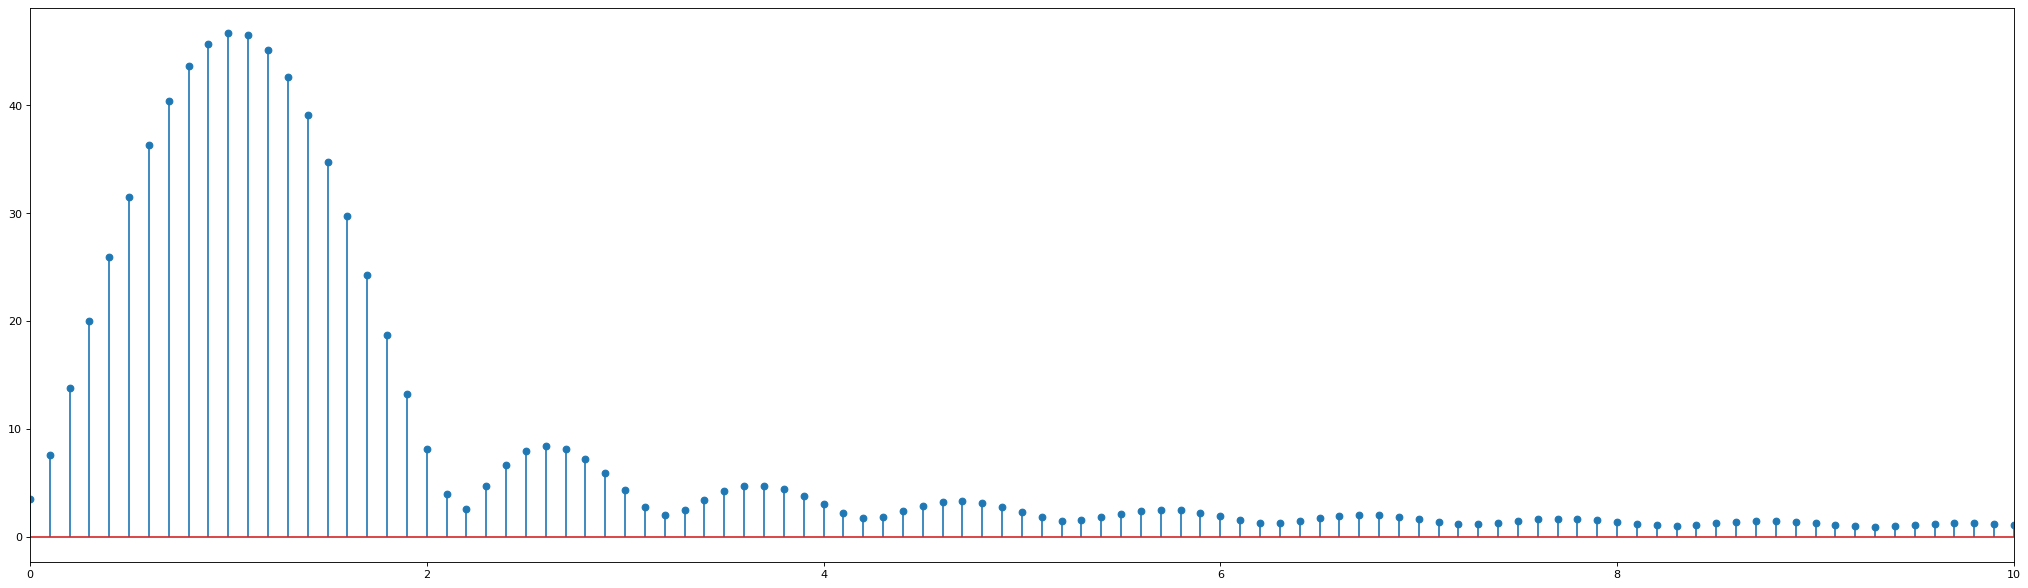

In [99]:
M = 1000
freq = np.arange( 0, M,1) *f0/M
plt.figure(figsize=(32, 9), dpi=80)
plt.xlim([0,10])
plt.stem( freq, np.absolute( fft.fft( v(t)*rect ) ) )

Les pics sont plûtot large. On à le pic principale à environ 1 (je suppose 1.12) et on à d'autre pics espacés je suppose aussi tous les 1.12hz. J'imagine que se sont les harmoniques du sinus.

### Question 4

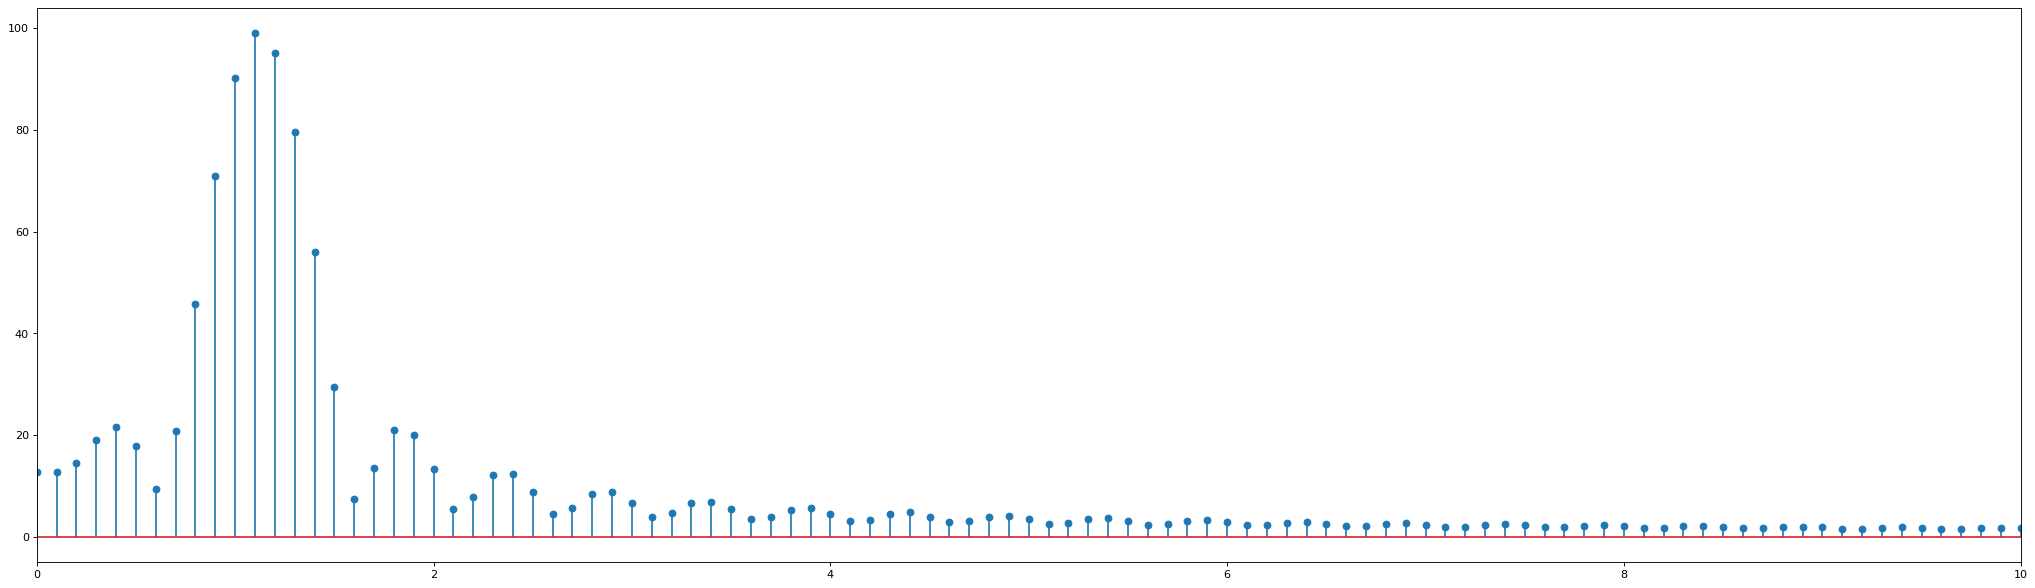

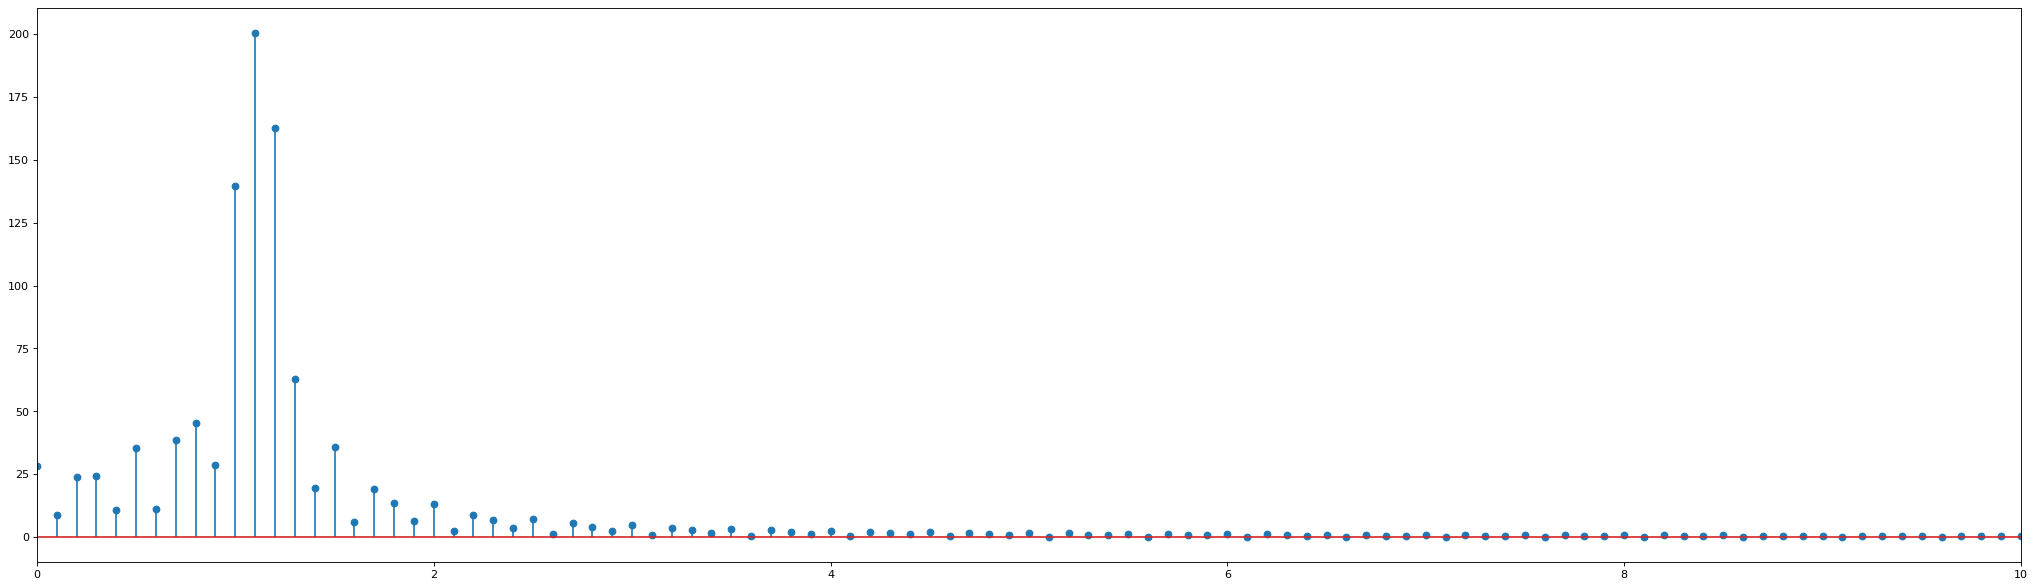

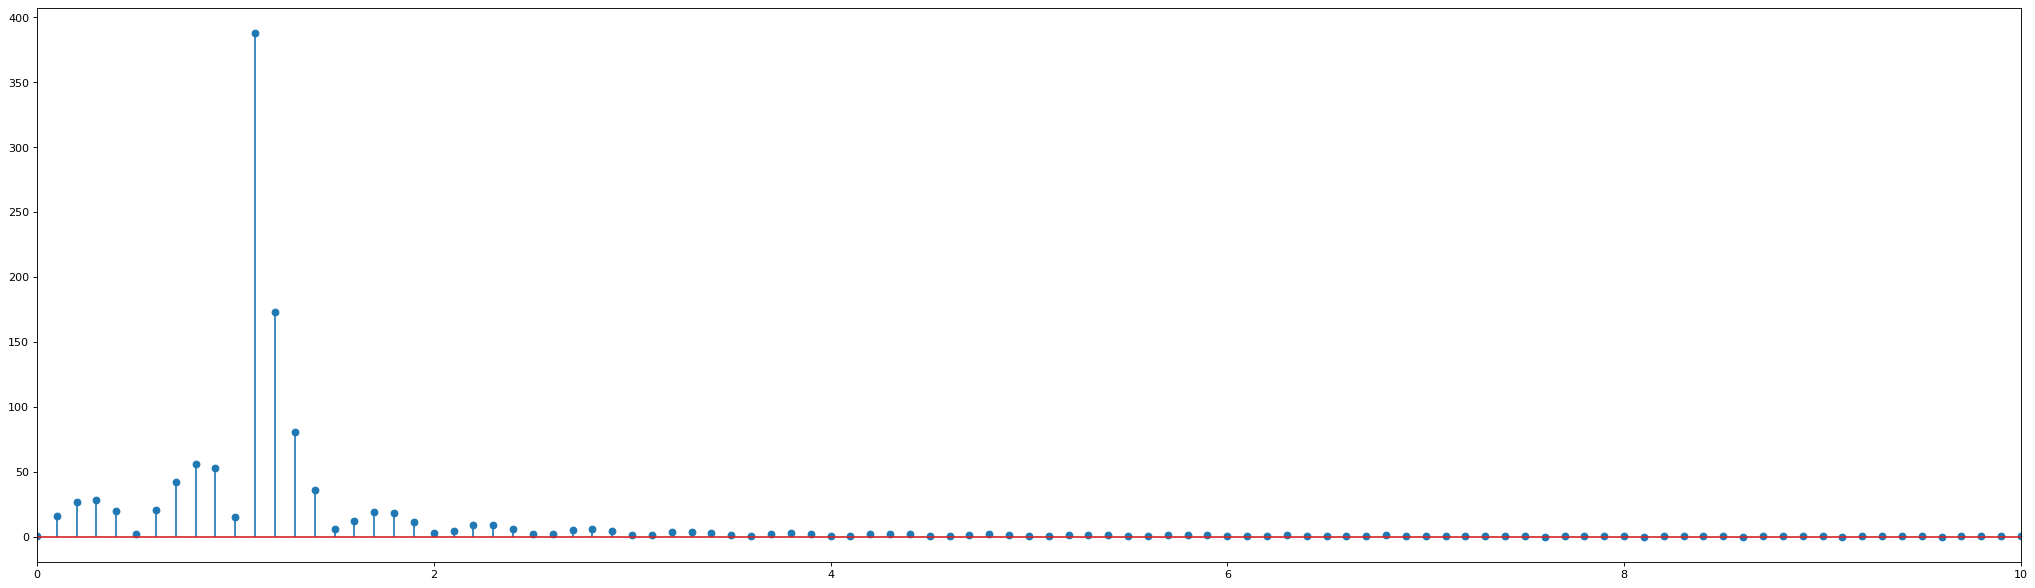

In [100]:
for T in (2,4,8):

    def rect_fen(t) :
        if t < T :
            return 1
        else :
            return 0

    rect = np.zeros(t.size)
    for k in range(t.size) :
        rect[k] = rect_fen(t[k])

    M = 1000
    freq = np.arange( 0, M,1) *f0/M
    plt.figure(figsize=(32, 9), dpi=80)
    plt.xlim([0,10])
    plt.stem( freq, np.absolute( fft.fft( v(t)*rect ) ) )

Plus on augmente la taille de la fenêtre, plus les pics sont visibles.

## Partie A

<StemContainer object of 3 artists>

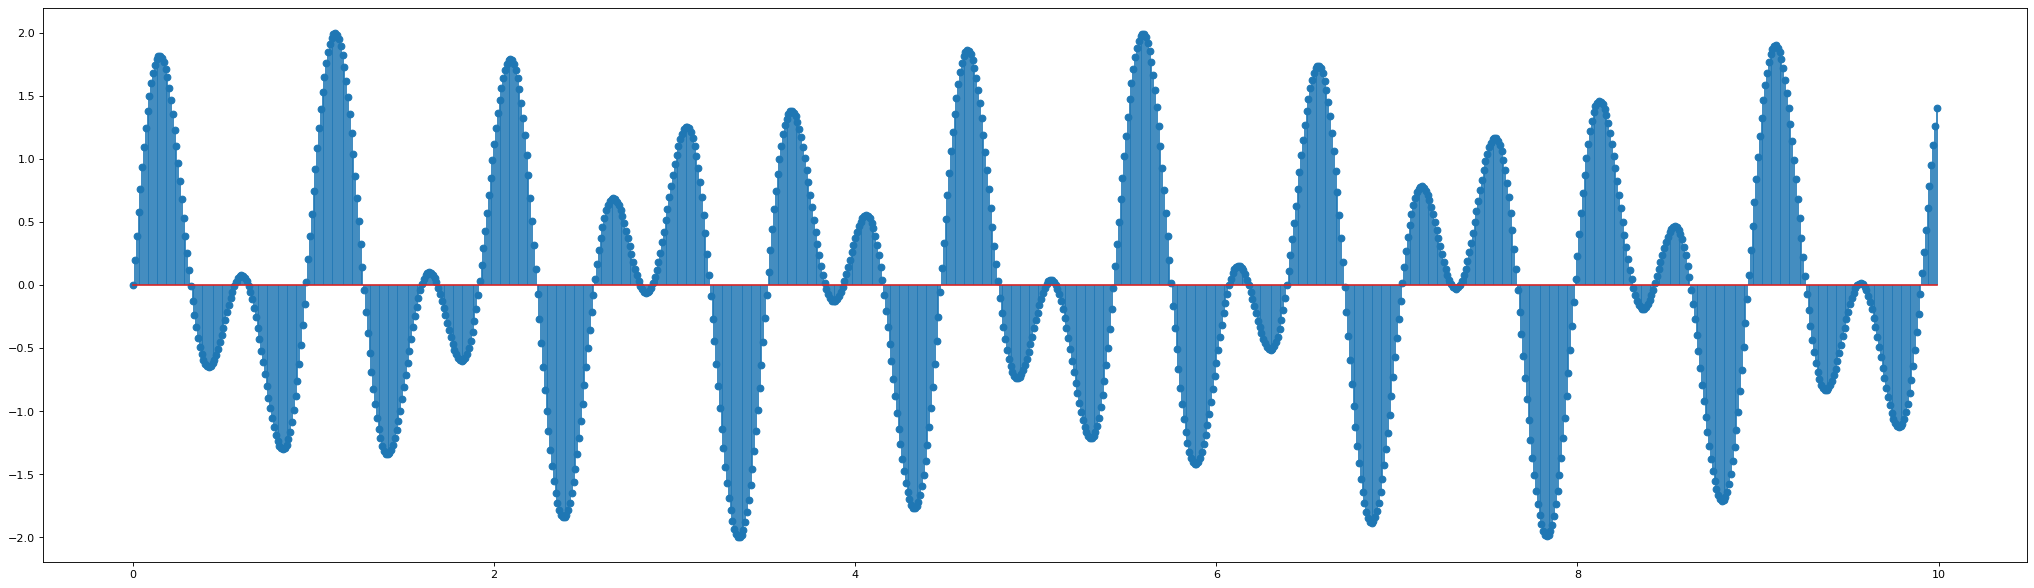

In [101]:
f0 = 100

t = np.arange(0,10,1/f0)

x = lambda t : np.sin(2 * np.pi * 1.12 * t) + np.sin(2 * np.pi * 2.01 * t)

plt.figure(figsize=(32, 9), dpi=80)
plt.stem(t,x(t))

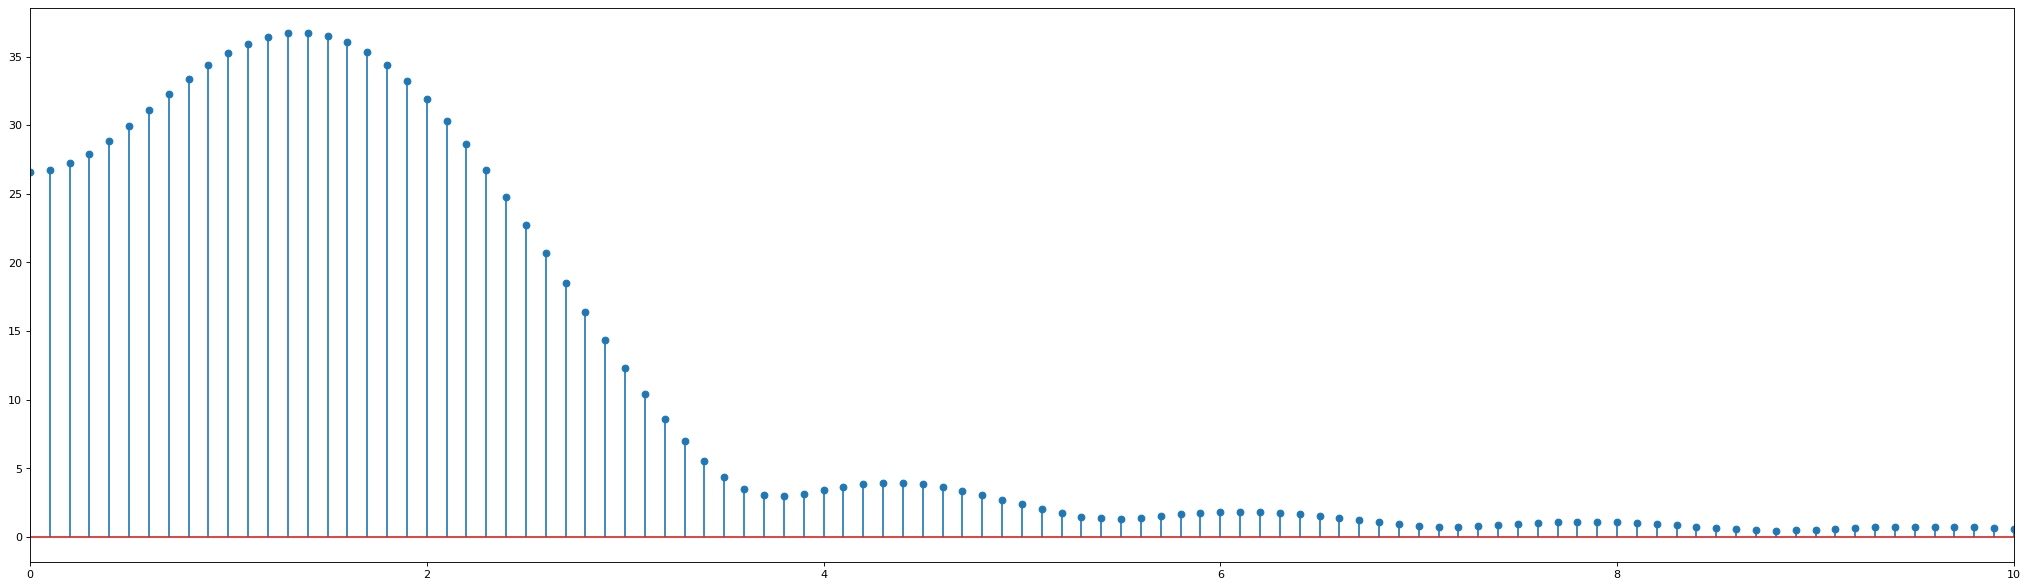

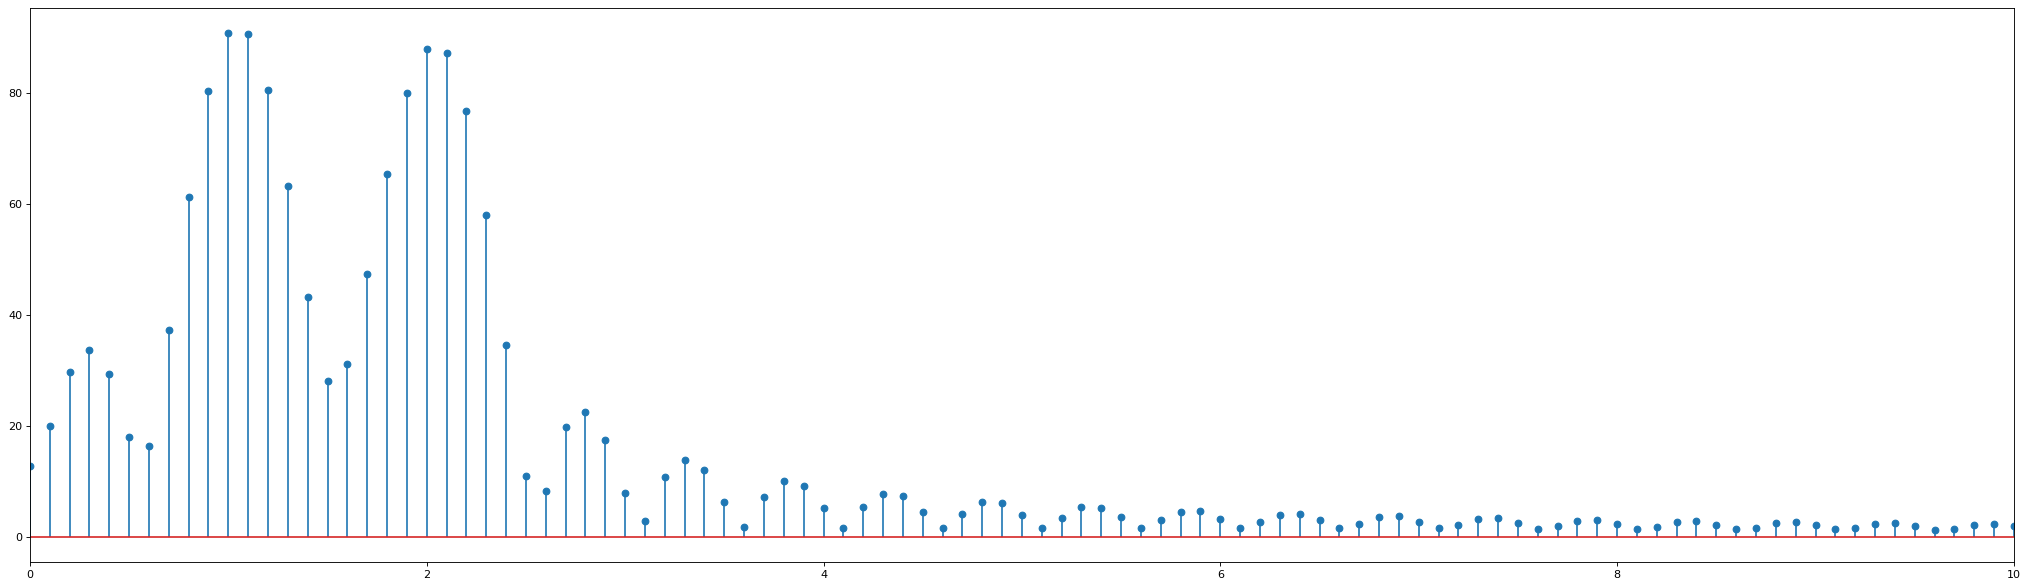

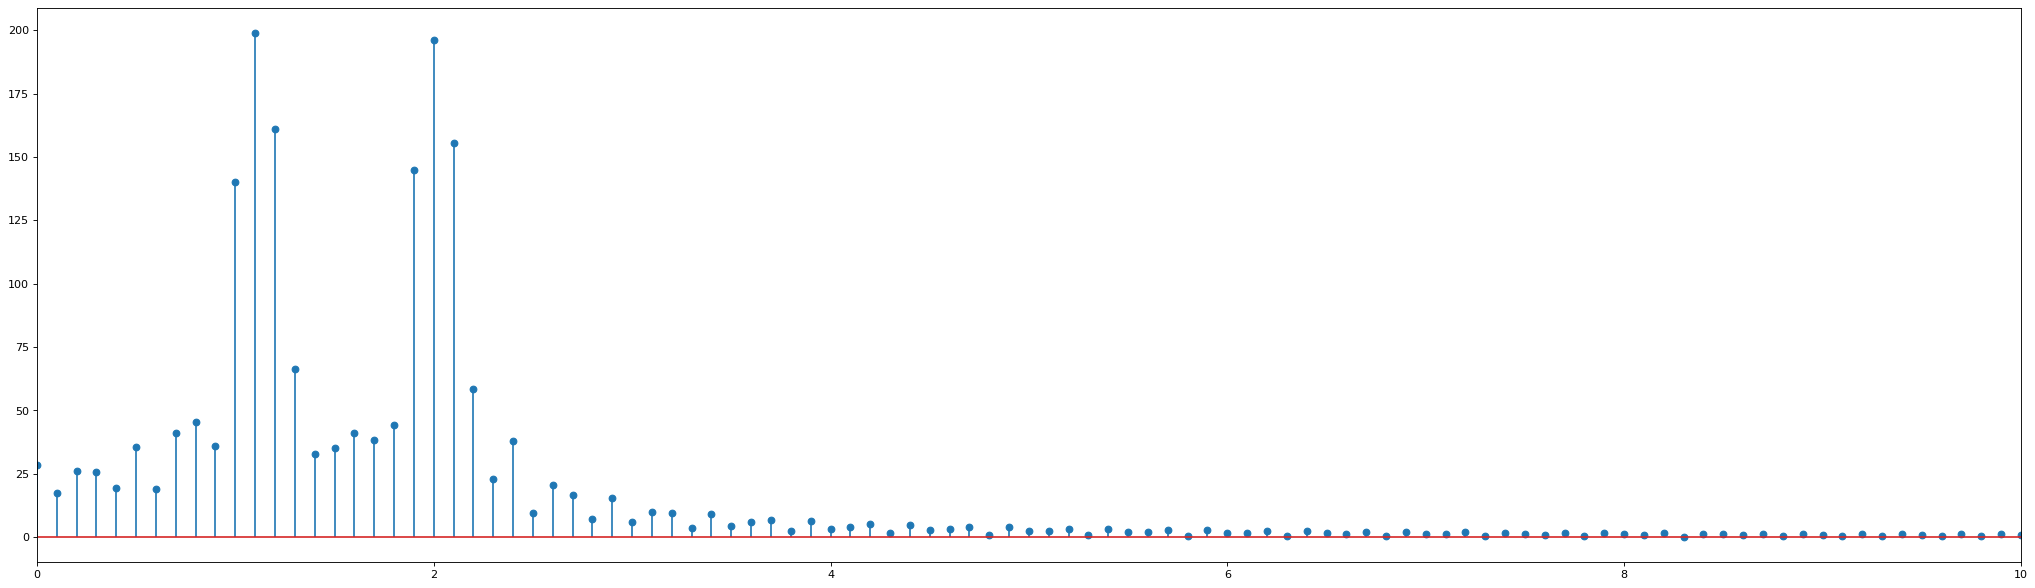

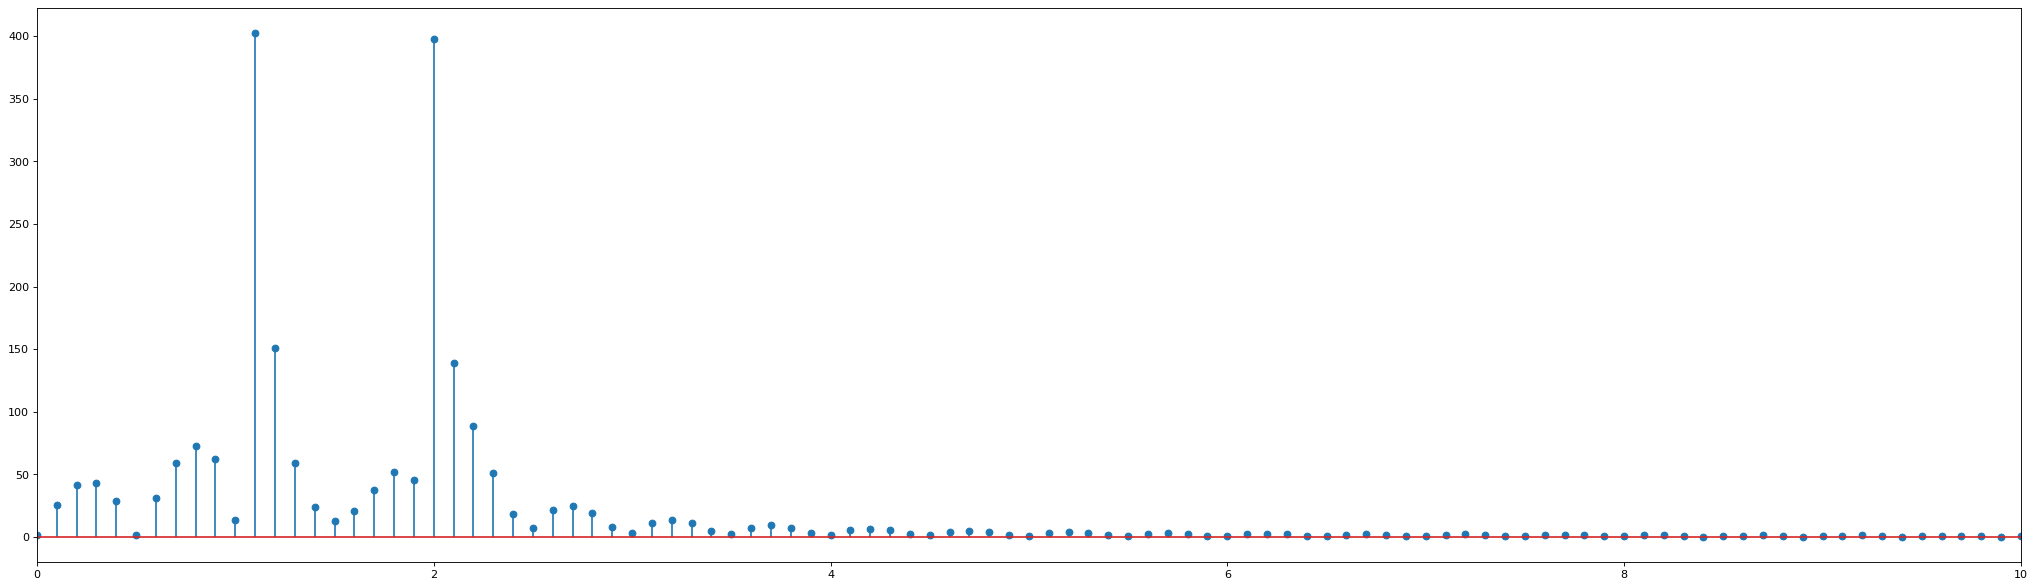

In [102]:
for T in (0.6,2,4,8):
    rect0 = np.zeros(t.size)

    for k in range(t.size) :
        rect0[k] = rect_fen(t[k])

    M = len(t)
    freq = np.arange( 0, M,1) *f0/M

    s_rect0 = fft.fft( x(t)*rect0 )

    plt.figure(figsize=(32, 9), dpi=80)
    plt.xlim([0,10])
    plt.stem( freq, np.absolute( s_rect0 ) )

On peut confirmer qu'en augmentant la taille de la fenêtre, on aperçoit beaucoup mieux les pics. Surtout ceux qui correpondent aux deux sinus.

## Partie B
### Question 1

<StemContainer object of 3 artists>

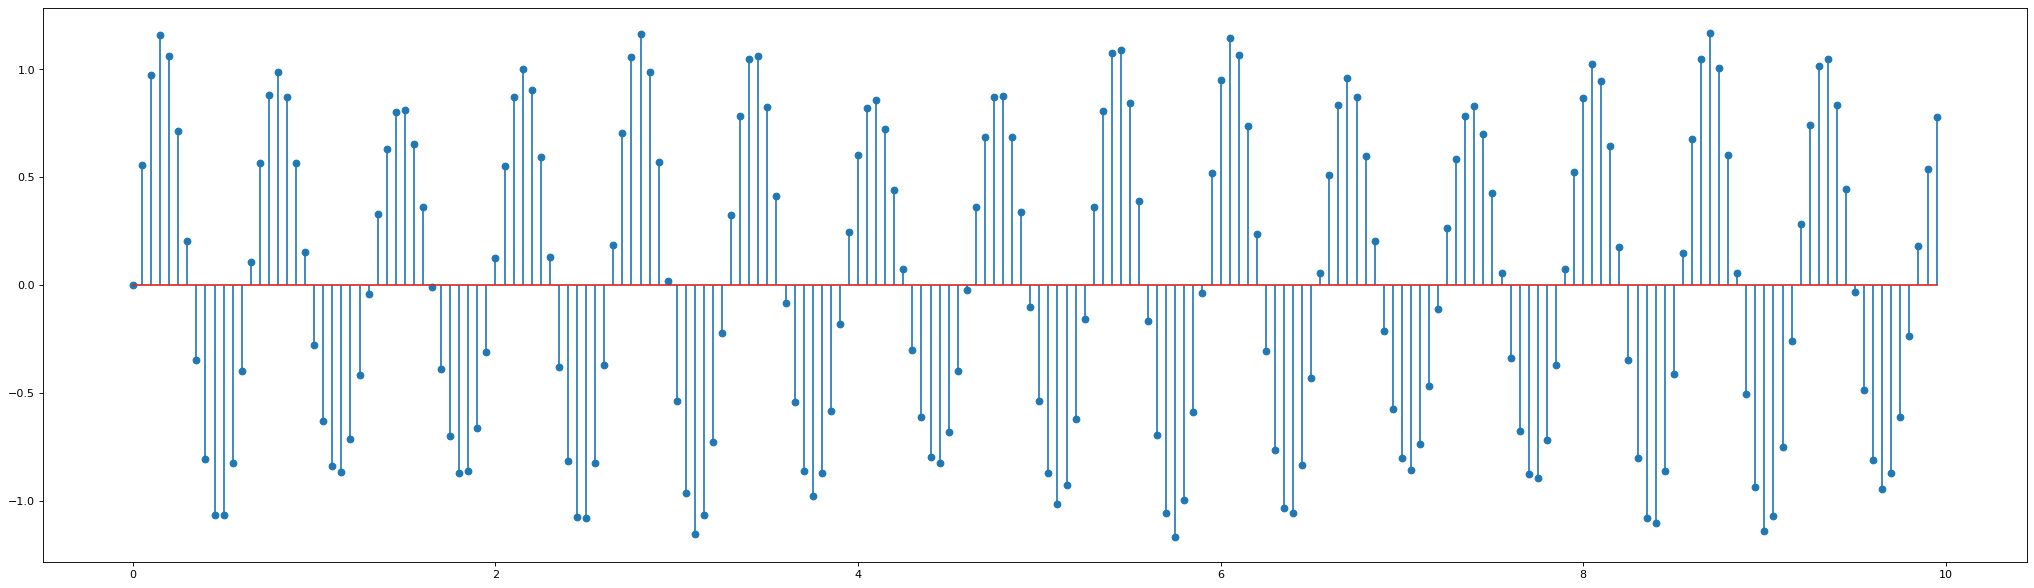

In [103]:
f0 = 20

t = np.arange(0,10,1/f0)

u = lambda t : np.sin(2 * np.pi * 1.524 * t) + 0.17 * np.sin(2 * np.pi * 1.867 * t)

plt.figure(figsize=(32, 9), dpi=80)
plt.stem(t,u(t))

### Question 2

In [104]:
T=7
rect2 = np.zeros(t.size)

for k in range(t.size) :
    rect2[k] = rect_fen(t[k])


<StemContainer object of 3 artists>

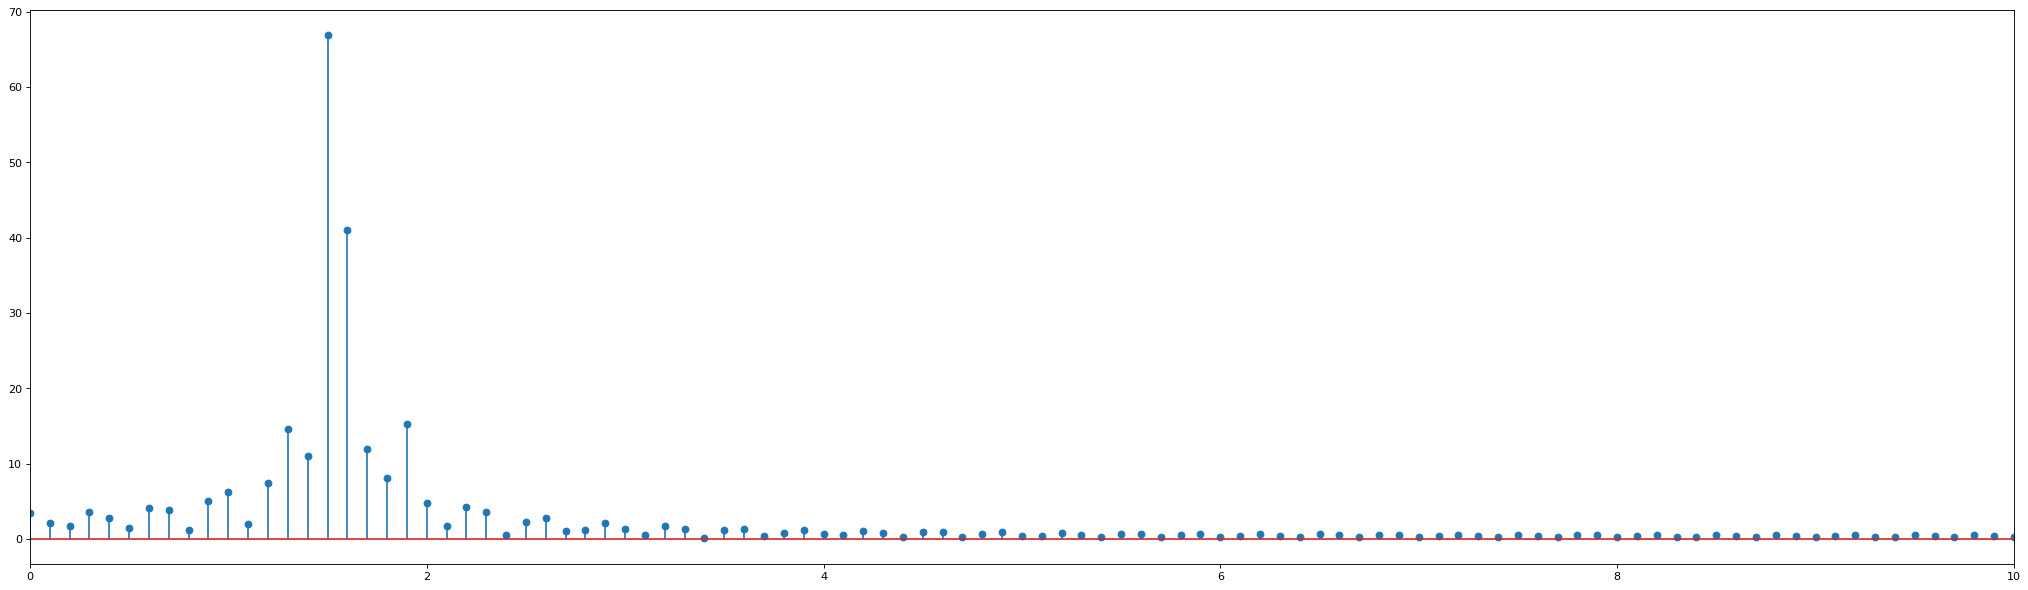

In [118]:
M = 200
freq = np.arange( 0, M,1) *f0/M

s_rect = fft.fft( u(t)*rect2 )

plt.figure(figsize=(32, 9), dpi=80)
plt.xlim([0,10])
plt.stem( freq, np.absolute( s_rect ) )

On voit que le pic correspond plus au sinus avec la fréquence 1.5hz, un second petit petit pic apparait vers 1.8hz, mais rien de très concluant.

### Question 3

<StemContainer object of 3 artists>

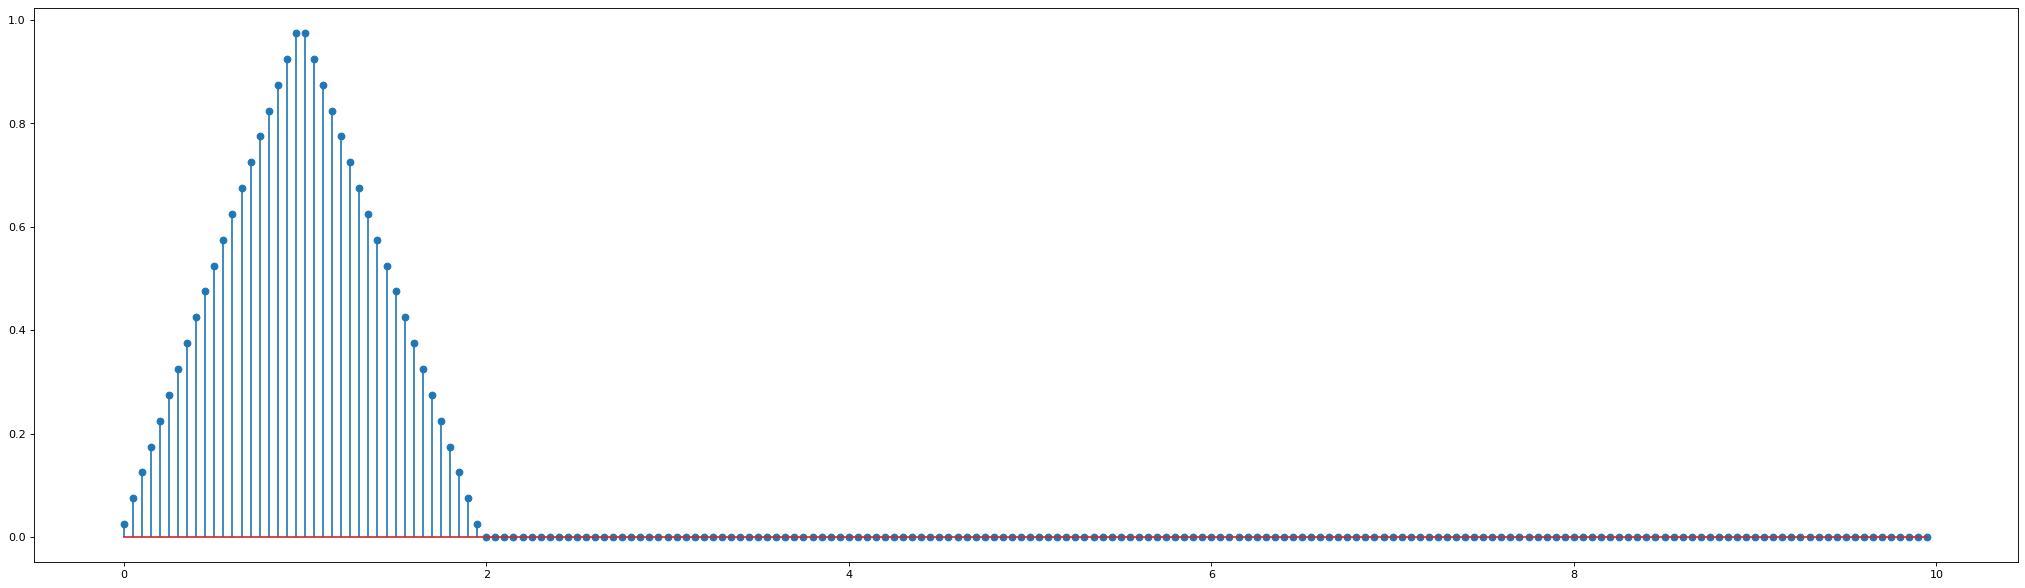

In [106]:
triang = signal.windows.triang
hamming = signal.windows.hamming

o=int(len(t)/10*2)

montriangle = np.concatenate( (triang(o) , np.zeros(len(t) - o)) )

plt.figure(figsize=(32, 9), dpi=80)
plt.stem( t, montriangle )

<StemContainer object of 3 artists>

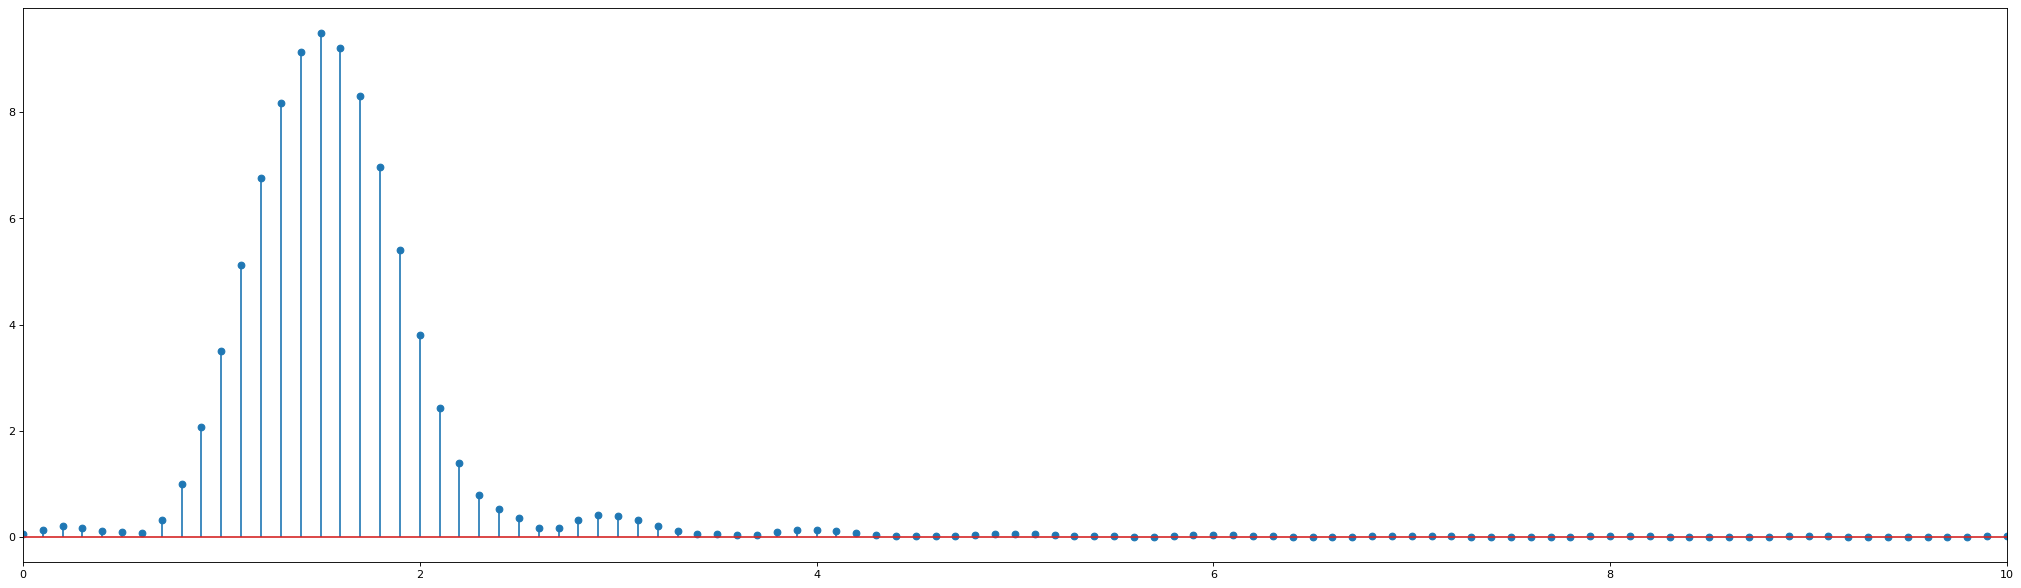

In [116]:
s_triangle = fft.fft( u(t)*montriangle )

plt.figure(figsize=(32, 9), dpi=80)
plt.xlim([0,10])
plt.stem( freq, np.absolute( s_triangle ) )

Avec le triangle, on voit un un sinus centré en 1.5hz.

<StemContainer object of 3 artists>

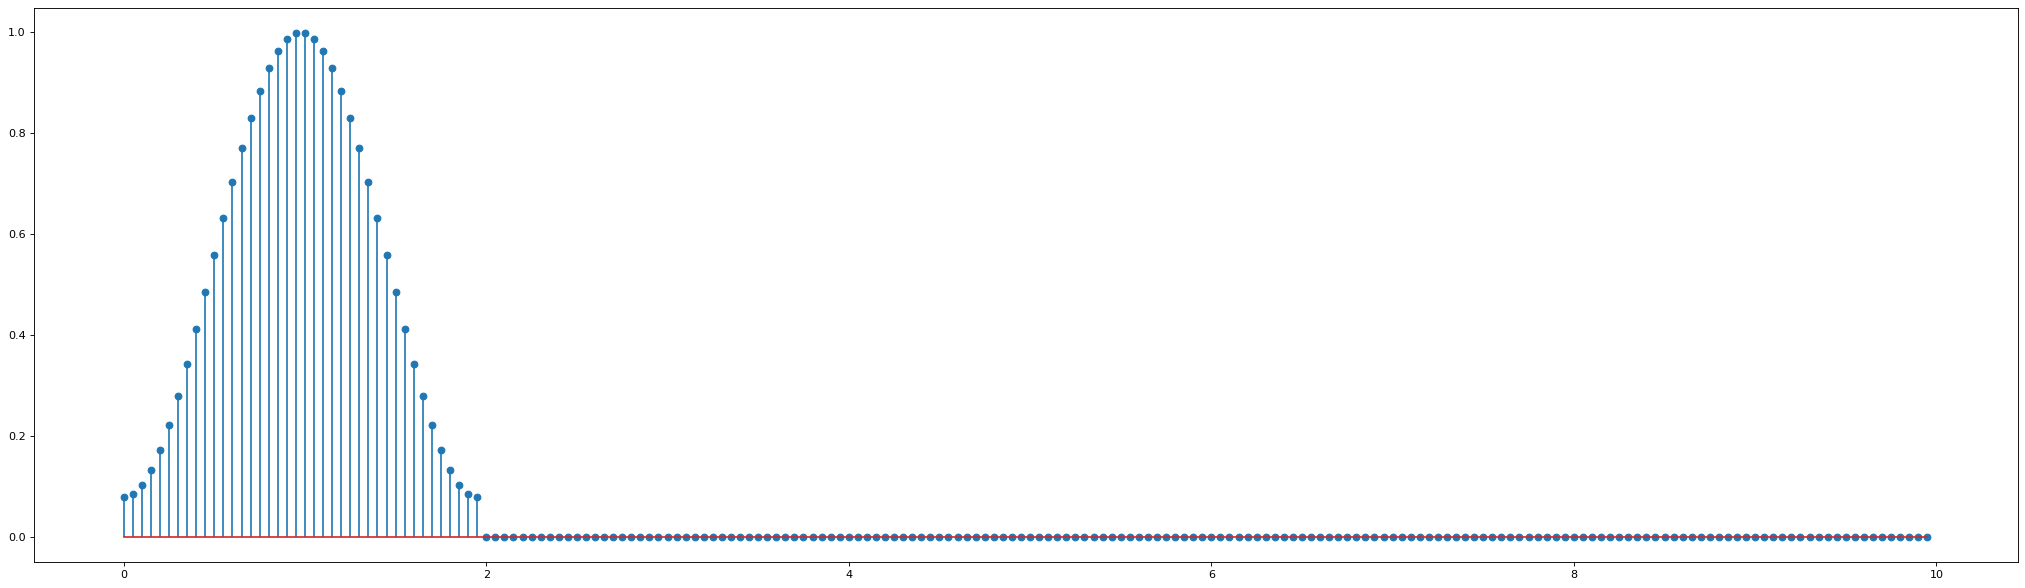

In [108]:
o=int(len(t)/10*2)

monhamming = np.concatenate( (hamming(o) , np.zeros(len(t) - o)) )

plt.figure(figsize=(32, 9), dpi=80)
plt.stem( t, monhamming )

<StemContainer object of 3 artists>

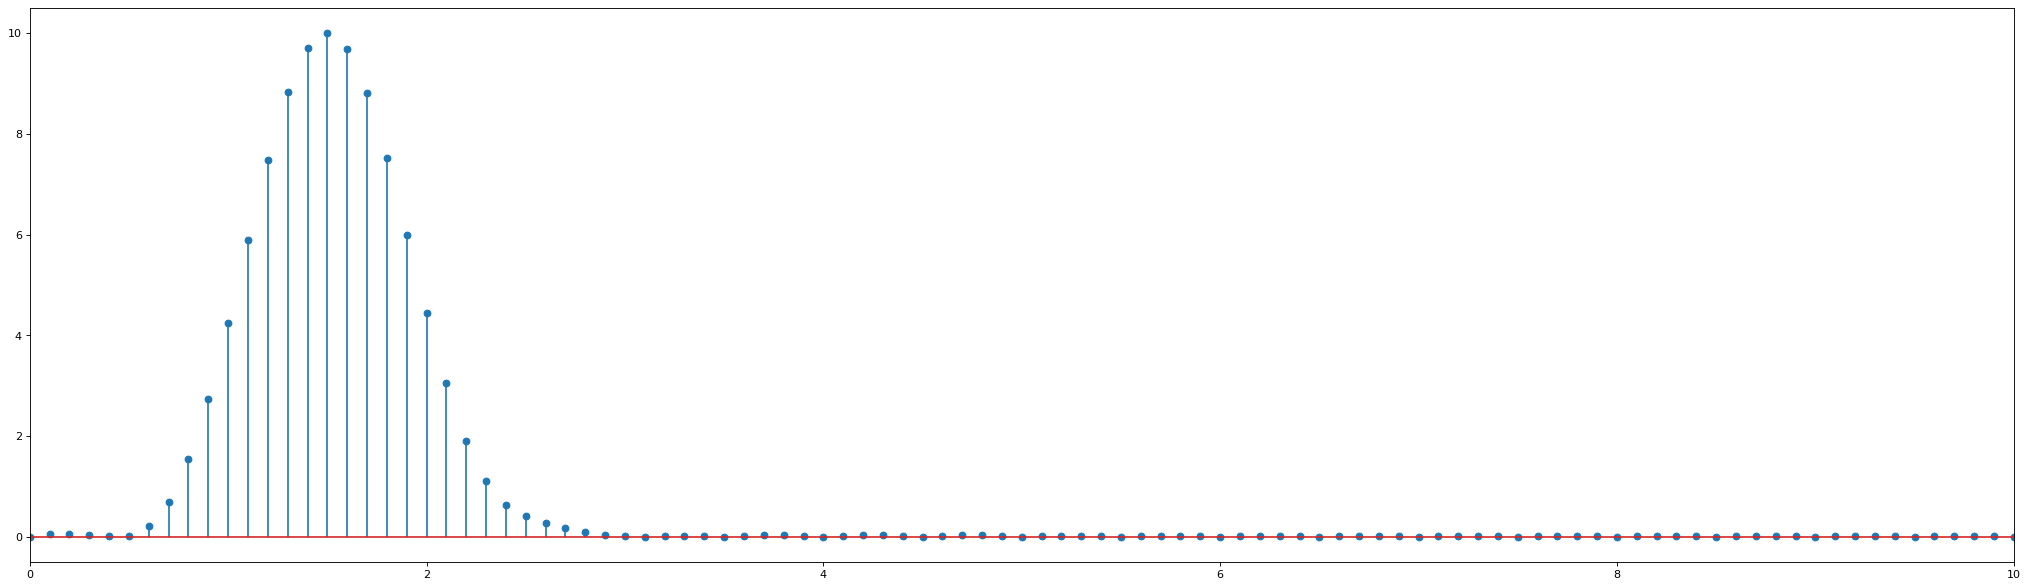

In [127]:
s_hamming = fft.fft( u(t)*monhamming )

plt.figure(figsize=(32, 9), dpi=80)
plt.xlim([0,10])
plt.stem( freq, np.absolute( s_hamming ) )

On voit une belle "gaussienne", centré en 1.5hz qui vient tout masqué, donc on ne voit pas du tout le 1.8hz. Par contre contrairement au triangle, on ne voit pas les harmoniques.

### Question 4

C:\Users\tomch\AppData\Local\Temp\ipykernel_19004\250763134.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.stem( freq , 20*np.log10(fftrect2/fftrect2.max())  , label="fenetre rectangle" )
C:\Users\tomch\AppData\Local\Temp\ipykernel_19004\250763134.py:7: RuntimeWarning: invalid value encountered in multiply
  plt.stem( freq , 20*np.log10(fftrect2/fftrect2.max())  , label="fenetre rectangle" )
C:\Users\tomch\AppData\Local\Temp\ipykernel_19004\250763134.py:11: RuntimeWarning: divide by zero encountered in log10
  plt.stem( freq , 20*np.log10(fftmontriangle/fftmontriangle.max())  , label="fenetre triangle")
C:\Users\tomch\AppData\Local\Temp\ipykernel_19004\250763134.py:11: RuntimeWarning: invalid value encountered in multiply
  plt.stem( freq , 20*np.log10(fftmontriangle/fftmontriangle.max())  , label="fenetre triangle")


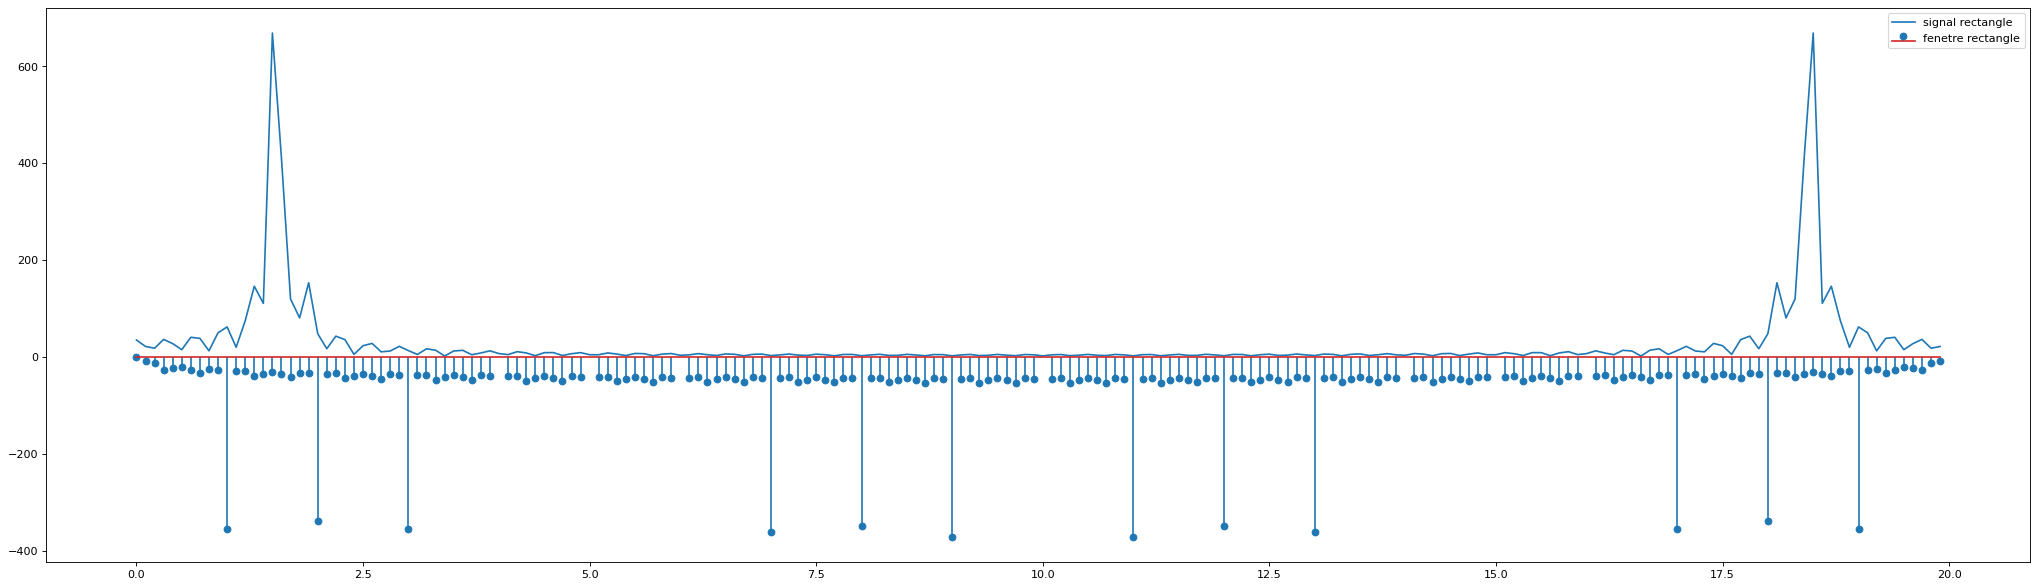

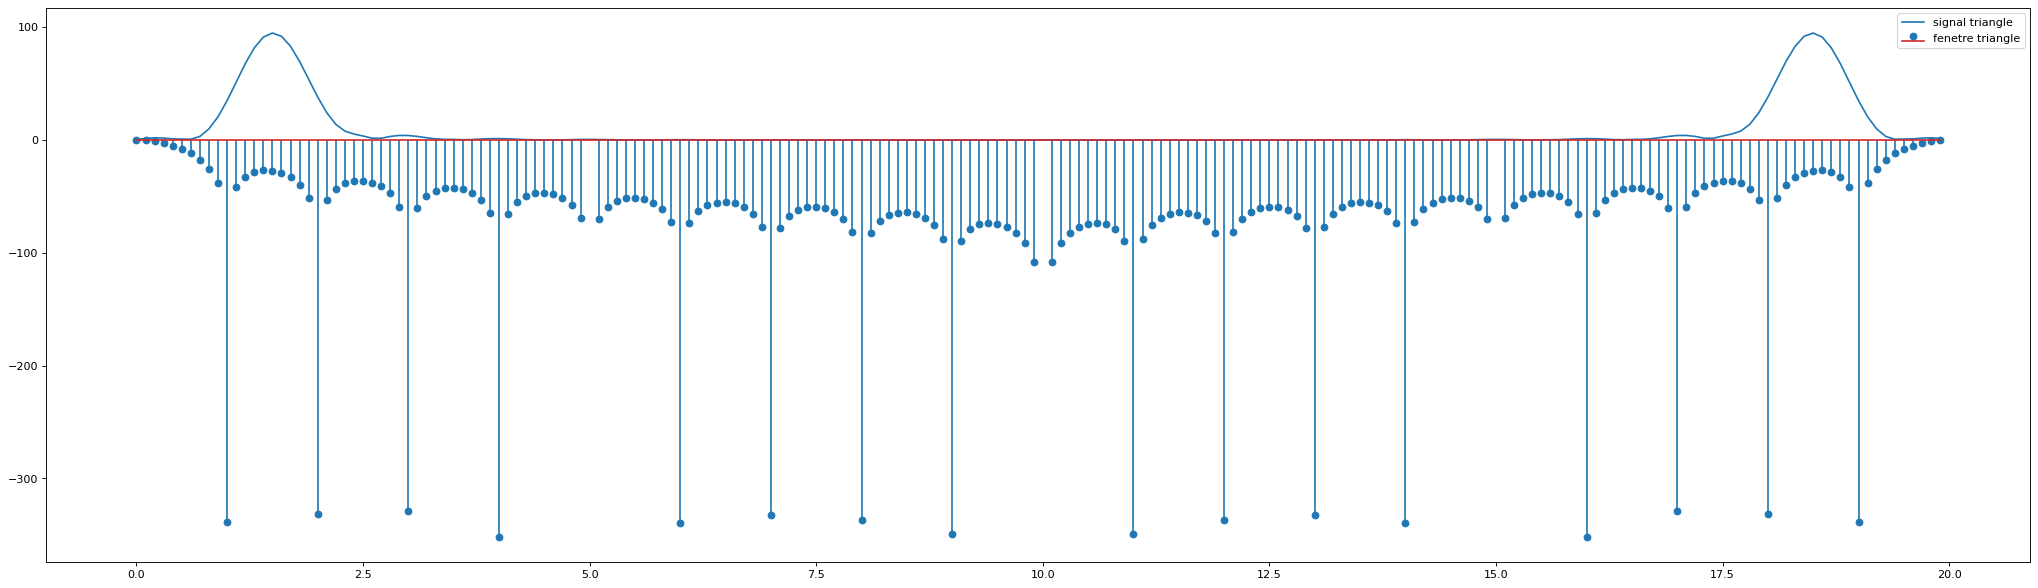

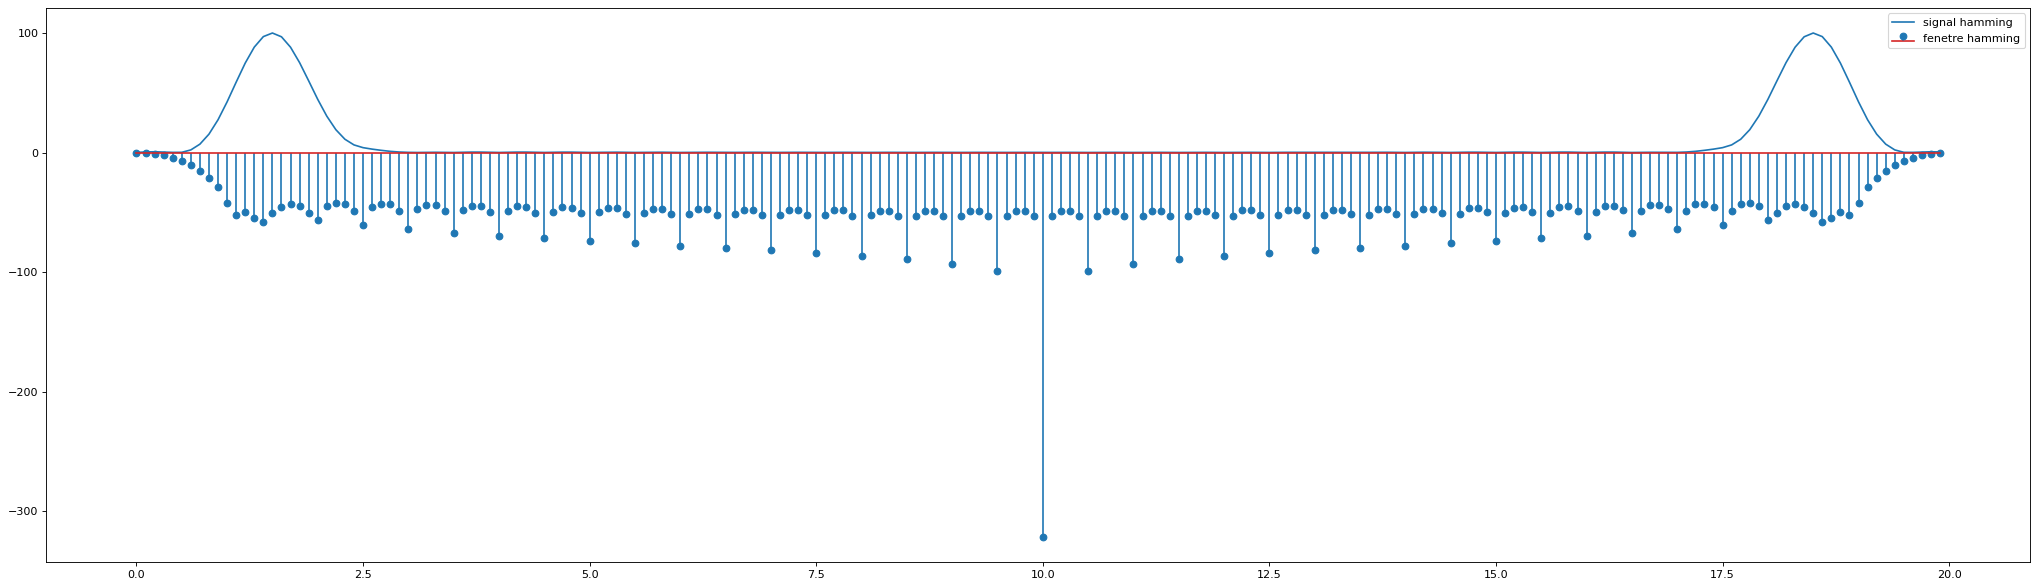

In [134]:
fftrect2 = fft.fft(rect2)
fftmontriangle = fft.fft(montriangle)
fftmonhamming = fft.fft(monhamming)

plt.figure(figsize=(32, 9), dpi=80)
plt.plot( freq , np.absolute(fft.fft(rect2*u(t)))*10  , label="signal rectangle" )
plt.stem( freq , 20*np.log10(fftrect2/fftrect2.max())  , label="fenetre rectangle" )
plt.legend()
plt.figure(figsize=(32, 9), dpi=80)
plt.plot( freq , np.absolute(fft.fft(montriangle*u(t)))*10  , label="signal triangle" )
plt.stem( freq , 20*np.log10(fftmontriangle/fftmontriangle.max())  , label="fenetre triangle")
plt.legend()
plt.figure(figsize=(32, 9), dpi=80)
plt.plot( freq , np.absolute(fft.fft(monhamming*u(t)))*10  , label="signal hamming" )
plt.stem( freq , 20*np.log10(fftmonhamming/fftmonhamming.max())  , label="fenetre hamming")
plt.legend()

Plus le spectre de la fenêtre est haut, plus les harmoniques sont visibles ( on le voit bien sur le rectangle ).
 